# Decision Tree

In this notebook we build a desicion tree based on Online Shoppers Purchasing Intention Dataset. We explore hyperparameters of the desicion tree using the ID3 decision tree learner from scikit-learn library. Learning algorithms that we looked at:

- Learning Algorithms
    - Gini 
    - Entropy

We also explore pre pruning methods to see if there is any improvement in accuracy and reliablitly of our desicion tree for both of above learning algorithms 

- Pre-pruning Methods
    - max_depth: maximum depth of decision tree: - [5,10,15]
    - min_sample_split: The minimum number of samples required to split an internal node - [2,3,4]
    - min_samples_leaf: The minimum number of samples required to be at a leaf no  - [1,2]

Finally, we investigate the nature of our imbalanced data on our best model with selecting equal number of samples from each class group to balance learning on these groups.

## The Dataset

- Class Names: indicating a revenue when True else False - ['False', 'True']
- Feature Names: ['ProductRelated_Duration', 'ProductRelatedAve', 'BounceRates', 'ExitRates', 'SpecialDay', 'Month', 'Region', 'VisitorType', 'Weekend']

## The Code

Our code is saved in the same folder with this report under descion_tree.py and data set is also at the same location called "online_shoppers_intention.csv". We created a set of definitions to help build our model

In [1]:
from Desicion_Tree import *

In [2]:
data_frame_os = read_data_return_frame("online_shoppers_intention.csv")

In [3]:
x, y, class_names, feature_names = preprocess_df(data_frame_os)

In [4]:
x_train, x_test, y_train, y_test, classifier = train_test_classifier(x, y, test_size = 0.25, criterion='gini')

* Creating prediction on training set using Gini Index without setting hyperparameters. This creates 100% accuracy and precision as expected

Train score 0.9997837136368551
Train Confusion matrix


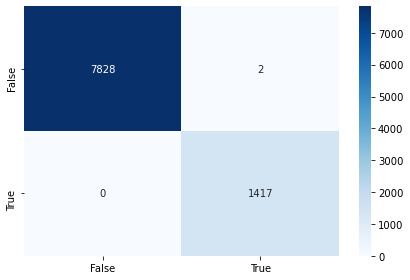

              False      True
precision  0.999745  1.000000
recall     1.000000  0.998591
f1-score   0.999872  0.999295


In [5]:
y_pred_train = prediction(classifier, x_train)
accuracy_cm_report(y_train, y_pred_train, class_names = class_names, dom='Train')

* Creating prediction on validation set using Gini Index without setting hyperparameters. This creates 74% accuracy and 86% precision on False and 23% on True. This clearly shows that our model is overfitting on out trainin data. 

* It is important to nore that recall value is very low on True class which indicates the unbalanced nature of our data.

Validation score 0.7680830360038923
Validation Confusion matrix


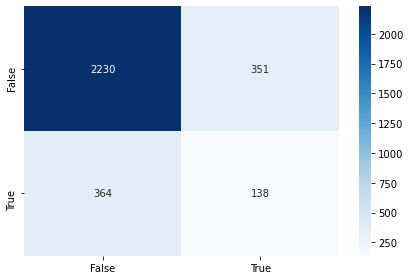

              False      True
precision  0.864006  0.274900
recall     0.859676  0.282209
f1-score   0.861836  0.278507


In [6]:
y_pred_test = prediction(classifier, x_test)
accuracy_cm_report(y_test, y_pred_test, class_names = class_names, dom='Validation')

## Grid Search for Best Parameters

* Since we are aware that we are overfitting our data to our model, we can define hyperparameters to find best pruning model. For this we will use GridSearchCV and extract best_estimator. We also set scoring parameter to 'f1' to overcome unbalanced nature of our data. 

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is :

                    F1 = 2 * (precision * recall) / (precision + recall)
                    
(sklearn.metrics.f1_score — scikit-learn 0.24.1 documentation, n.d.)

In [116]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [5,6,7,8,None],
          'min_samples_leaf': [5,6,7,8],
          'min_samples_split': [5,6,7,8,9]
         }

In [117]:
clf = tree.DecisionTreeClassifier(criterion='gini')
gcv = GridSearchCV(estimator=clf,param_grid=params, scoring='f1')
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8, None],
                         'min_samples_leaf': [5, 6, 7, 8],
                         'min_samples_split': [5, 6, 7, 8, 9]},
             scoring='f1')

In [108]:
print(f'Best Parameters are : {gcv.best_params_}')

Best Parameters are : {'max_depth': None, 'min_samples_leaf': 7, 'min_samples_split': 6}


* We now train our desicion tree with the best parameters we could find

Train score 0.8923975343354601
Train Confusion matrix


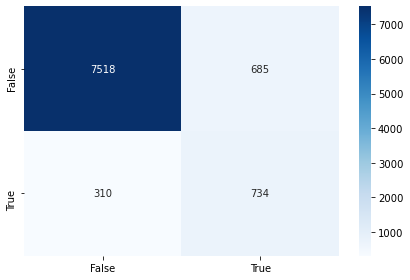

              False      True
precision  0.916494  0.703065
recall     0.960399  0.517266
f1-score   0.937933  0.596021


In [109]:
y_pred_train = gcv.predict(x_train)
y_pred_test = gcv.predict(x_test)

accuracy_cm_report(y_train, y_pred_train, class_names = class_names, dom='Train')

While we decrease the accuracy in training set intentionally to avoid overfitting. Below is the effect that hyperparameters have on validation set

Validation score 0.7969510217320791
Validation Confusion matrix


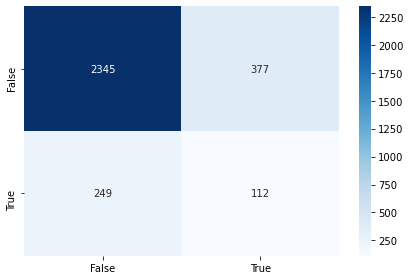

              False      True
precision  0.861499  0.310249
recall     0.904009  0.229039
f1-score   0.882242  0.263529


In [110]:
accuracy_cm_report(y_test, y_pred_test, class_names = class_names, dom='Validation')

* With parameters used on validation set we are now reporting 79% on accuracy which is 3% more than previous version.
    * Where presicion stays almost the same for False class True class presicion increased by 4%
    * We observe a slight uplift on F1 value on False class but still slight decrease on True class

## Best Parameters with Entropy

In [112]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
gcv = GridSearchCV(estimator=clf,param_grid=params, scoring='f1')
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [5, 6, 7, 8, None],
                         'min_samples_leaf': [5, 6, 7, 8],
                         'min_samples_split': [5, 6, 7, 8, 9]},
             scoring='f1')

In [114]:
y_pred_test = gcv.predict(x_test)

Validation score 0.7865715212455401
Validation Confusion matrix


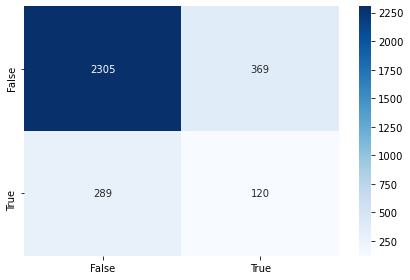

              False      True
precision  0.862004  0.293399
recall     0.888589  0.245399
f1-score   0.875095  0.267261


In [115]:
accuracy_cm_report(y_test, y_pred_test, class_names = class_names, dom='Validation')

* When Entropy used as learning algorithm overall accuracy reported 1% less than gini wih similar outcomes on False and True classses. There is a slight increase by 2% on recall value for True class where presicion is down by 2%

## Conclusion

* We have seen that hyperparameters used in this example slightly increased the persicion and F1 values for classes as aganist overfitter version that does not use any scoring adjustment or pre-pruning technics. 


* There are no context-independent or usage independent reasons to favor one learning or classification method over another. If one algorithm seems to outperform in a particular situation, it is a consequence of its fit to the particular problem.(Module CEGE0004 Week-07 Lecture Slides).  We will perform other supervised machine learning technics to investigate further.


# References

sklearn.model_selection.StratifiedKFold — scikit-learn 0.24.1 documentation. (n.d.). 
    Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

Haixiang, G., Yijing, L., Shang, J., Mingyun, G., Yuanyue, H., & Bing, G. (2017). Learning from class-imbalanced data:
    Review of methods and applications. Expert Systems with Applications, 73, 220–239.




sklearn.metrics.f1_score — scikit-learn 0.24.1 documentation. (n.d.). Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html



Lipani, A. (2021) UCL (University College London)Module CEGE0004 Week-07 Lecture Slides, Page 5